In [8]:
import numpy as np

In [9]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [14]:
np.random.seed(42)

In [15]:
employee_ids = [f"EMP_{i:03d}" for i in range(1,31)]

In [16]:
dates = pd.date_range("2025-07-01",periods=30,freq="D")

In [18]:
employee_ids

['EMP_001',
 'EMP_002',
 'EMP_003',
 'EMP_004',
 'EMP_005',
 'EMP_006',
 'EMP_007',
 'EMP_008',
 'EMP_009',
 'EMP_010',
 'EMP_011',
 'EMP_012',
 'EMP_013',
 'EMP_014',
 'EMP_015',
 'EMP_016',
 'EMP_017',
 'EMP_018',
 'EMP_019',
 'EMP_020',
 'EMP_021',
 'EMP_022',
 'EMP_023',
 'EMP_024',
 'EMP_025',
 'EMP_026',
 'EMP_027',
 'EMP_028',
 'EMP_029',
 'EMP_030']

In [21]:
data = {
    "Date": np.tile(dates,len(employee_ids)),
    "Employee_ID":np.repeat(employee_ids,len(dates)),
    "Working_Hours":np.random.uniform(4,10,size=len(dates)*len(employee_ids)).round(2)
}

In [24]:
df = pd.DataFrame(data)

In [25]:
df.to_csv("Employee_working_hours.csv",index=False)

In [26]:
df_csv = pd.read_csv("employee_working_hours.csv")

In [27]:
print(df_csv.head())

         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_001           5.25
1  2025-07-02     EMP_001           4.16
2  2025-07-03     EMP_001           5.09
3  2025-07-04     EMP_001           7.50
4  2025-07-05     EMP_001           6.53


In [28]:
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

       Working_Hours
count     900.000000
mean        7.016256
std         1.757421
min         4.030000
25%         5.430000
50%         7.075000
75%         8.532500
max        10.000000
30


In [29]:
total_hours=df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)


In [30]:
avg_daily = df_csv.groupby("Employee_ID")["Working_Hours"].mean()


In [42]:
threshold_low = 5 
threshold_high = 9
df_csv["Low_Hour_Flag"] = df_csv["Working_Hours"] < threshold_low
df_csv["High_Hour_Flag"] = df_csv["Working_Hours"] > threshold_high

In [46]:
print(df_csv[df_csv["Low_Hour_Flag"] |df_csv["High_Hour_Flag"]].head()
     )

          Date Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
1   2025-07-02     EMP_001           4.16           True           False
5   2025-07-06     EMP_001           9.36          False            True
17  2025-07-18     EMP_001           9.69          False            True
19  2025-07-20     EMP_001           4.84           True           False
20  2025-07-21     EMP_001           9.21          False            True


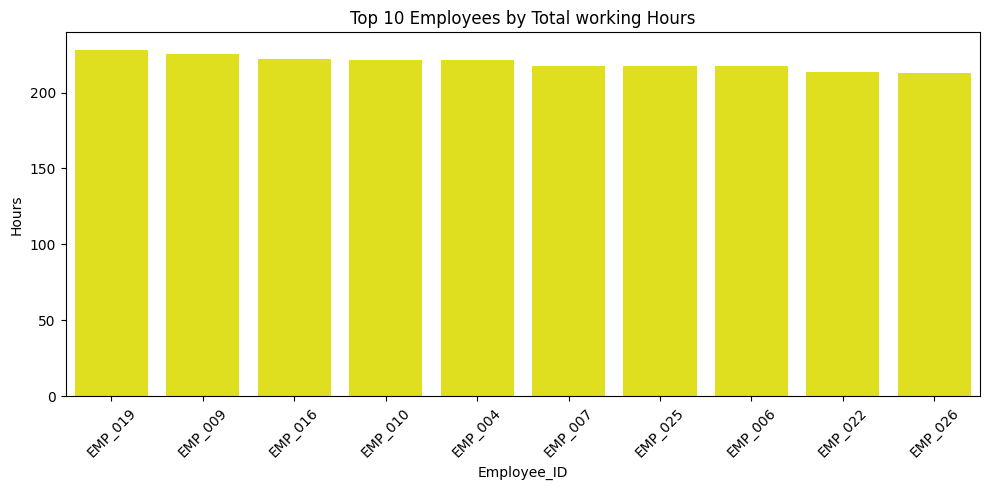

In [56]:
top10 = total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10.values,color = 'yellow')
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total working Hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()

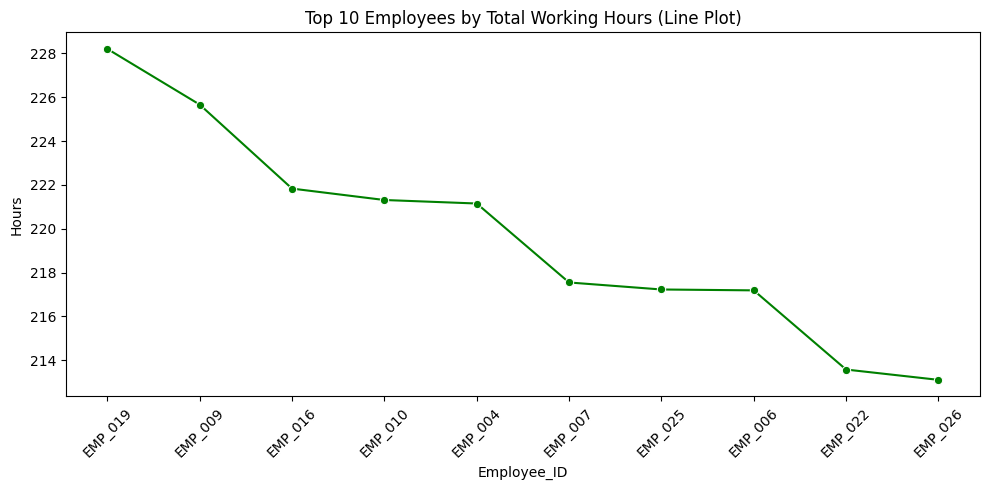

In [59]:
top10 = total_hours.head(10)

plt.figure(figsize=(10, 5))
sns.lineplot(x=top10.index, y=top10.values, marker='o', color='green')
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total Working Hours (Line Plot)")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()

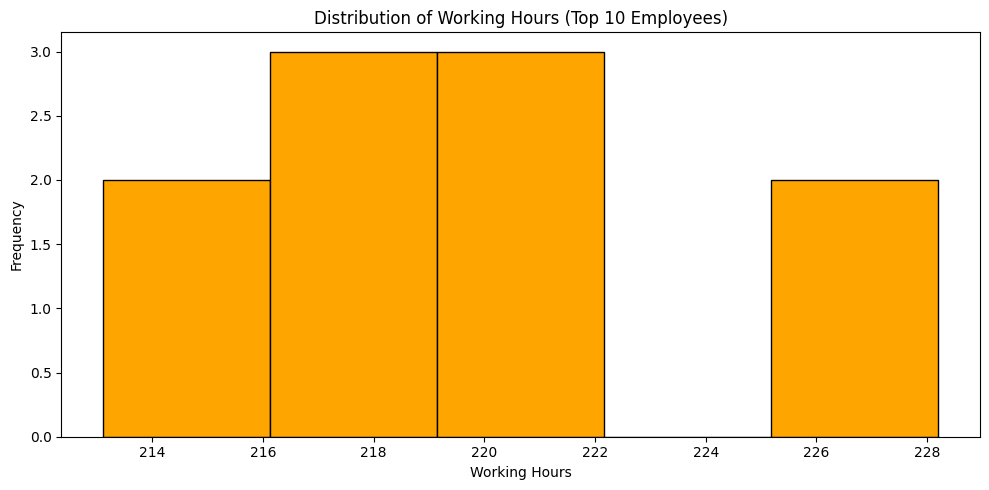

In [60]:
plt.figure(figsize=(10, 5))
plt.hist(top10.values, bins=5, color='orange', edgecolor='black')
plt.title("Distribution of Working Hours (Top 10 Employees)")
plt.xlabel("Working Hours")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


NameError: name 'FuncAnimation' is not defined

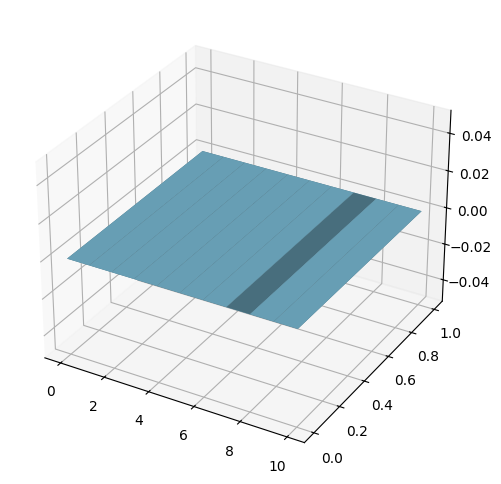

In [61]:
top10 = total_hours.head(10)
x_labels = list(top10.index)
y_pos = np.arange(len(x_labels))
z = np.zeros(len(x_labels))
dx = dy = np.ones(len(x_labels))
dz = top10.values

# Plot setup
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

bars = ax.bar3d(y_pos, z, z, dx, dy, np.zeros_like(dz), color='skyblue')

def update(frame):
    for i, b in enumerate(bars):
        b.set_3d_properties(dz * frame / 50, zdir='z')
    return bars

ani = FuncAnimation(fig, update, frames=50, interval=100, repeat=False)

# Axis labels
ax.set_title("Top 10 Employees by Total Working Hours (3D Animation)")
ax.set_xlabel("Employee Index")
ax.set_ylabel("")
ax.set_zlabel("Working Hours")
ax.set_xticks(y_pos)
ax.set_xticklabels(x_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()





